# Week 16 - Final Project Stage 0 - DANN Co.
Member of DANN Co. :
1. Dadin Tajudin (Project Manager)
2. Athariq Marsha Nugraha (Data Engineer)
3. Nada Paradita (Data Scientist)
4. Nida Febiana (Business / Data Analyst)

In [4]:
# Import
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

numpy version :  1.26.4
pandas version :  2.2.2
seaborn version :  0.13.2


In [5]:
# Load Data Set, Overview, dan Kategorisasi
df = pd.read_csv('C:/Users/Athariq Nugraha/Downloads/employee_churn_prediction_updated.csv')
df.head(5)

employee_id  age  gender    education  experience_years  monthly_target  \
0            1   28    Male  High School                 0             153   
1            2   41    Male      Diploma                 6             188   
2            3   36  Female  High School                 8             159   
3            4   32    Male      Diploma                 7             185   
4            5   29  Female  High School                 7             142   

   target_achievement  working_hours_per_week  overtime_hours_per_week  \
0                0.94                      62                        9   
1                0.54                      55                        8   
2                0.44                      59                       10   
3                0.66                      68                       15   
4                1.01                      45                        9   

    salary  commission_rate  job_satisfaction work_location  \
0  4667108             0.03                 4      Suburban   
1  5853507             0.06                 3         Urban   
2  4781336             0.07                 1         Urban   
3  3624588             0.05                 1         Urban   
4  5154327             0.08                 3         Rural   

   manager_support_score  company_tenure_years  churn marital_status  \
0                      3                   2.8      0        Married   
1                      3                   2.7      1         Single   
2                      2                   1.7      1         Single   
3                      2                   0.5      1        Married   
4                      2                   4.5      0         Single   

   distance_to_office_km churn_period  
0                     22       Stayed  
1                     36   Onboarding  
2                     17   Onboarding  
3                     32   Onboarding  
4                     14       Stayed

In [6]:
df.describe()

employee_id          age  experience_years  monthly_target  \
count  1000.000000  1000.000000       1000.000000     1000.000000   
mean    500.500000    32.845000          4.495000      125.877000   
std     288.819436     6.854046          2.890732       43.895748   
min       1.000000    22.000000          0.000000       50.000000   
25%     250.750000    27.000000          2.000000       86.750000   
50%     500.500000    33.000000          5.000000      127.500000   
75%     750.250000    39.000000          7.000000      164.000000   
max    1000.000000    44.000000          9.000000      199.000000   

       target_achievement  working_hours_per_week  overtime_hours_per_week  \
count          1000.00000             1000.000000              1000.000000   
mean              0.79188               54.102000                 9.508000   
std               0.22872                8.721907                 5.739066   
min               0.40000               40.000000                 0.000000   
25%               0.59000               46.000000                 5.000000   
50%               0.79000               54.000000                 9.500000   
75%               0.99000               62.000000                15.000000   
max               1.20000               69.000000                19.000000   

             salary  commission_rate  job_satisfaction  manager_support_score  \
count  1.000000e+03      1000.000000       1000.000000             1000.00000   
mean   5.487914e+06         0.058830          2.524000                2.53200   
std    1.436482e+06         0.023278          1.125474                1.11724   
min    3.000037e+06         0.020000          1.000000                1.00000   
25%    4.258970e+06         0.040000          2.000000                2.00000   
50%    5.471270e+06         0.060000          3.000000                3.00000   
75%    6.727894e+06         0.080000          4.000000                4.00000   
max    7.999712e+06         0.100000          4.000000                4.00000   

       company_tenure_years        churn  distance_to_office_km  
count            1000.00000  1000.000000            1000.000000  
mean                2.59800     0.629000              24.119000  
std                 1.40282     0.483314              13.978062  
min                 0.10000     0.000000               1.000000  
25%                 1.40000     0.000000              12.000000  
50%                 2.60000     1.000000              23.500000  
75%                 3.80000     1.000000              36.000000  
max                 5.00000     1.000000              49.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   employee_id              1000 non-null   int64  
 1   age                      1000 non-null   int64  
 2   gender                   1000 non-null   object 
 3   education                1000 non-null   object 
 4   experience_years         1000 non-null   int64  
 5   monthly_target           1000 non-null   int64  
 6   target_achievement       1000 non-null   float64
 7   working_hours_per_week   1000 non-null   int64  
 8   overtime_hours_per_week  1000 non-null   int64  
 9   salary                   1000 non-null   int64  
 10  commission_rate          1000 non-null   float64
 11  job_satisfaction         1000 non-null   int64  
 12  work_location            1000 non-null   object 
 13  manager_support_score    1000 non-null   int64  
 14  company_tenure_years     

In [8]:
df.describe(include='object')

gender education work_location marital_status churn_period
count    1000      1000          1000           1000         1000
unique      2         3             3              2            4
top      Male   Diploma         Urban         Single       Stayed
freq      703       404           500            606          371

In [12]:
df.columns

Index(['employee_id', 'age', 'gender', 'education', 'experience_years',
       'monthly_target', 'target_achievement', 'working_hours_per_week',
       'overtime_hours_per_week', 'salary', 'commission_rate',
       'job_satisfaction', 'work_location', 'manager_support_score',
       'company_tenure_years', 'churn', 'marital_status',
       'distance_to_office_km', 'churn_period'],
      dtype='object')

In [13]:
nums = ['employee_id', 'age', 'experience_years','monthly_target', 'target_achievement',
        'working_hours_per_week', 'overtime_hours_per_week', 'salary', 'commission_rate',
        'job_satisfaction', 'manager_support_score','company_tenure_years', 
        'distance_to_office_km']
# 3 numerical
cats = ['gender', 'education', 'work_location', 'churn', 'marital_status', 'churn_period']
# 18 categorical

# Total 21 Parameters

In [ ]:
# Pendekatan Grafis

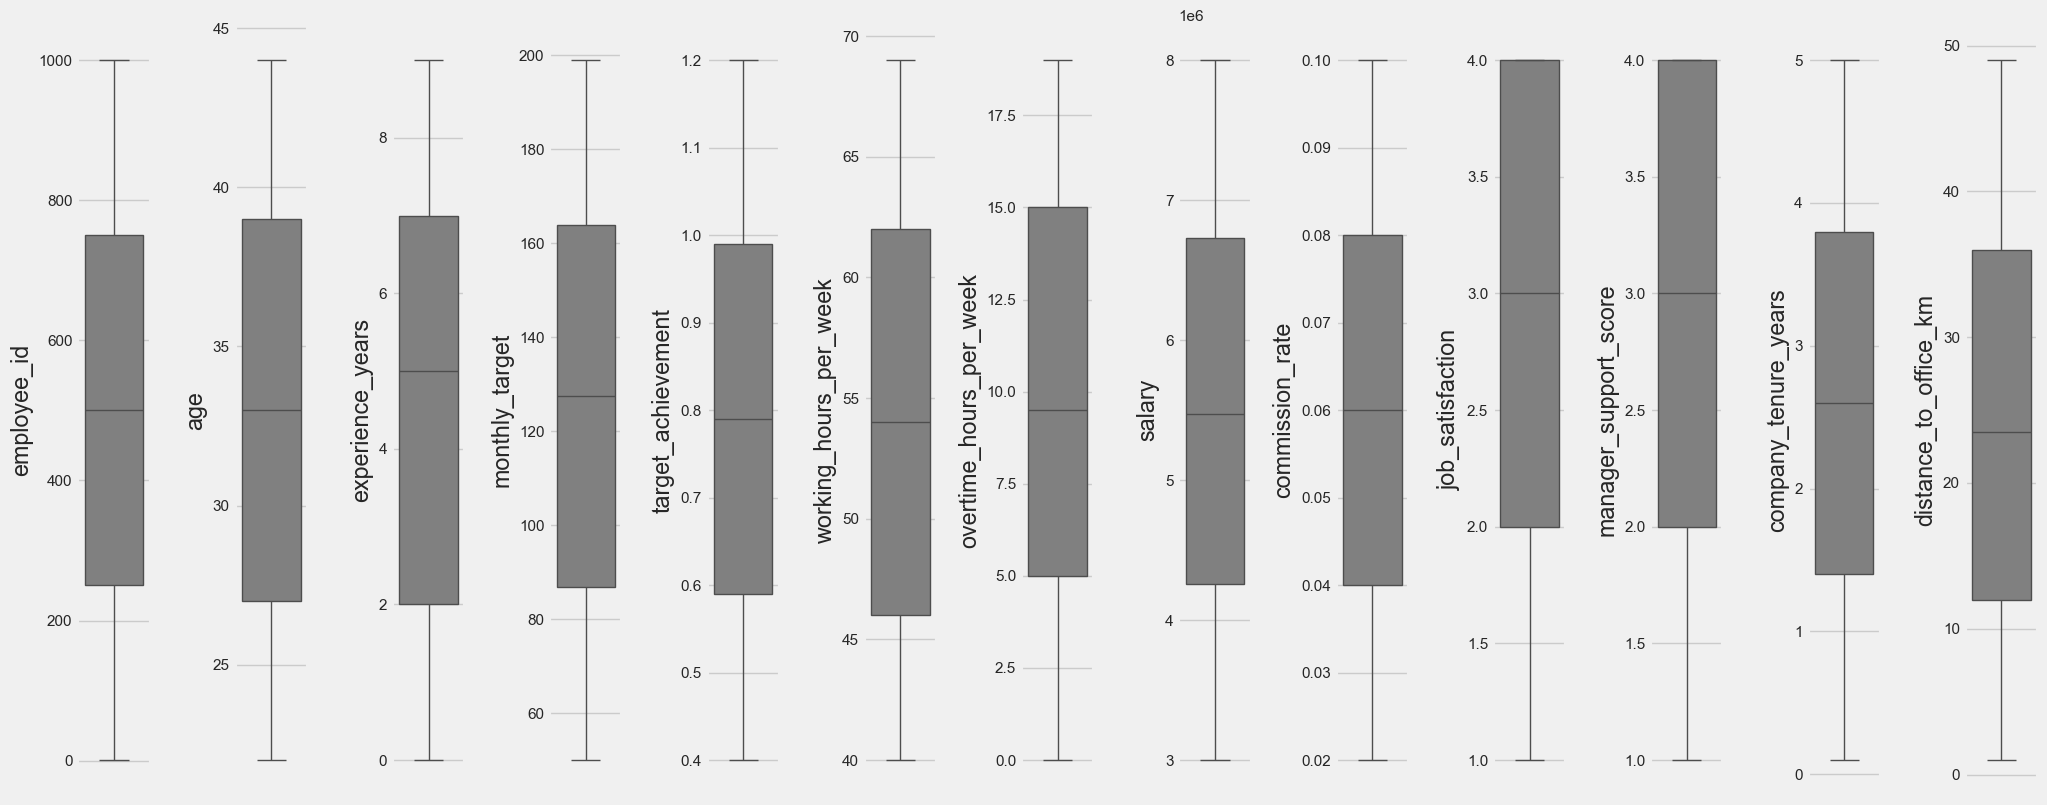

In [14]:
# Box Plot
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()
plt.show()

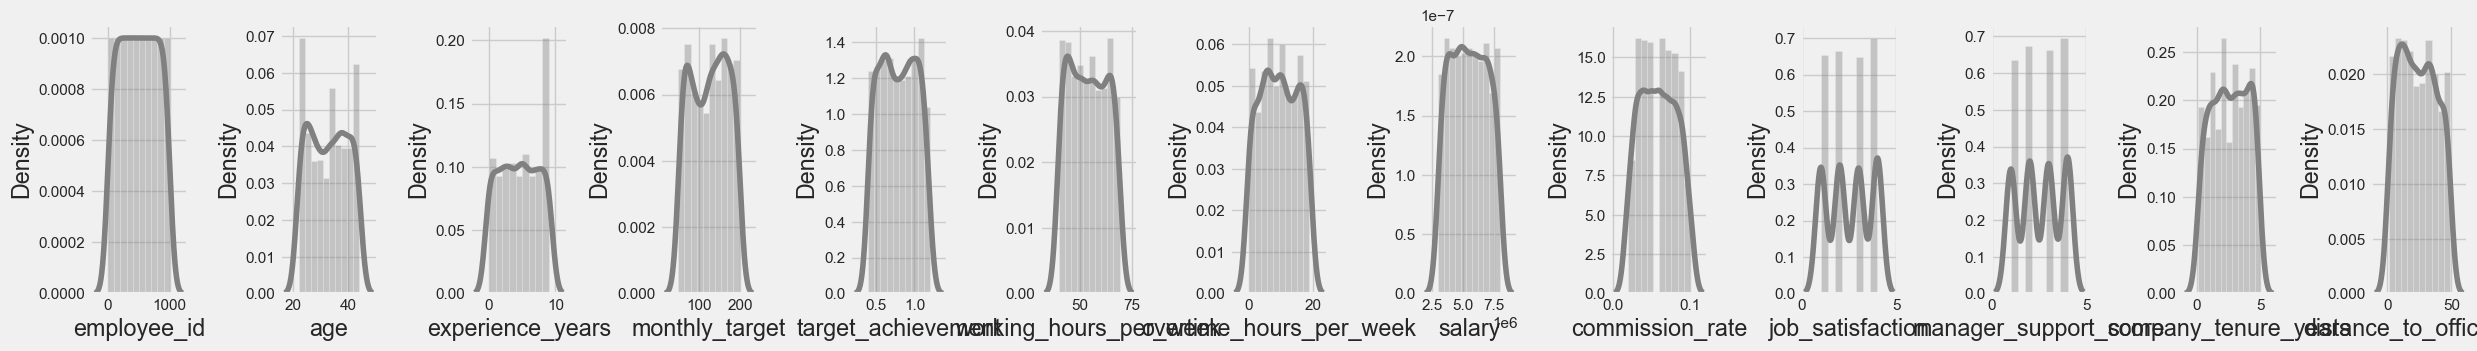

In [38]:
# Dist Plot
plt.figure(figsize=(25, 10))
for i in range(0, len(nums)):
    plt.subplot(3, len(nums), i+1)
    sns.distplot(df[nums[i]], color='gray')
    plt.tight_layout()
plt.show()

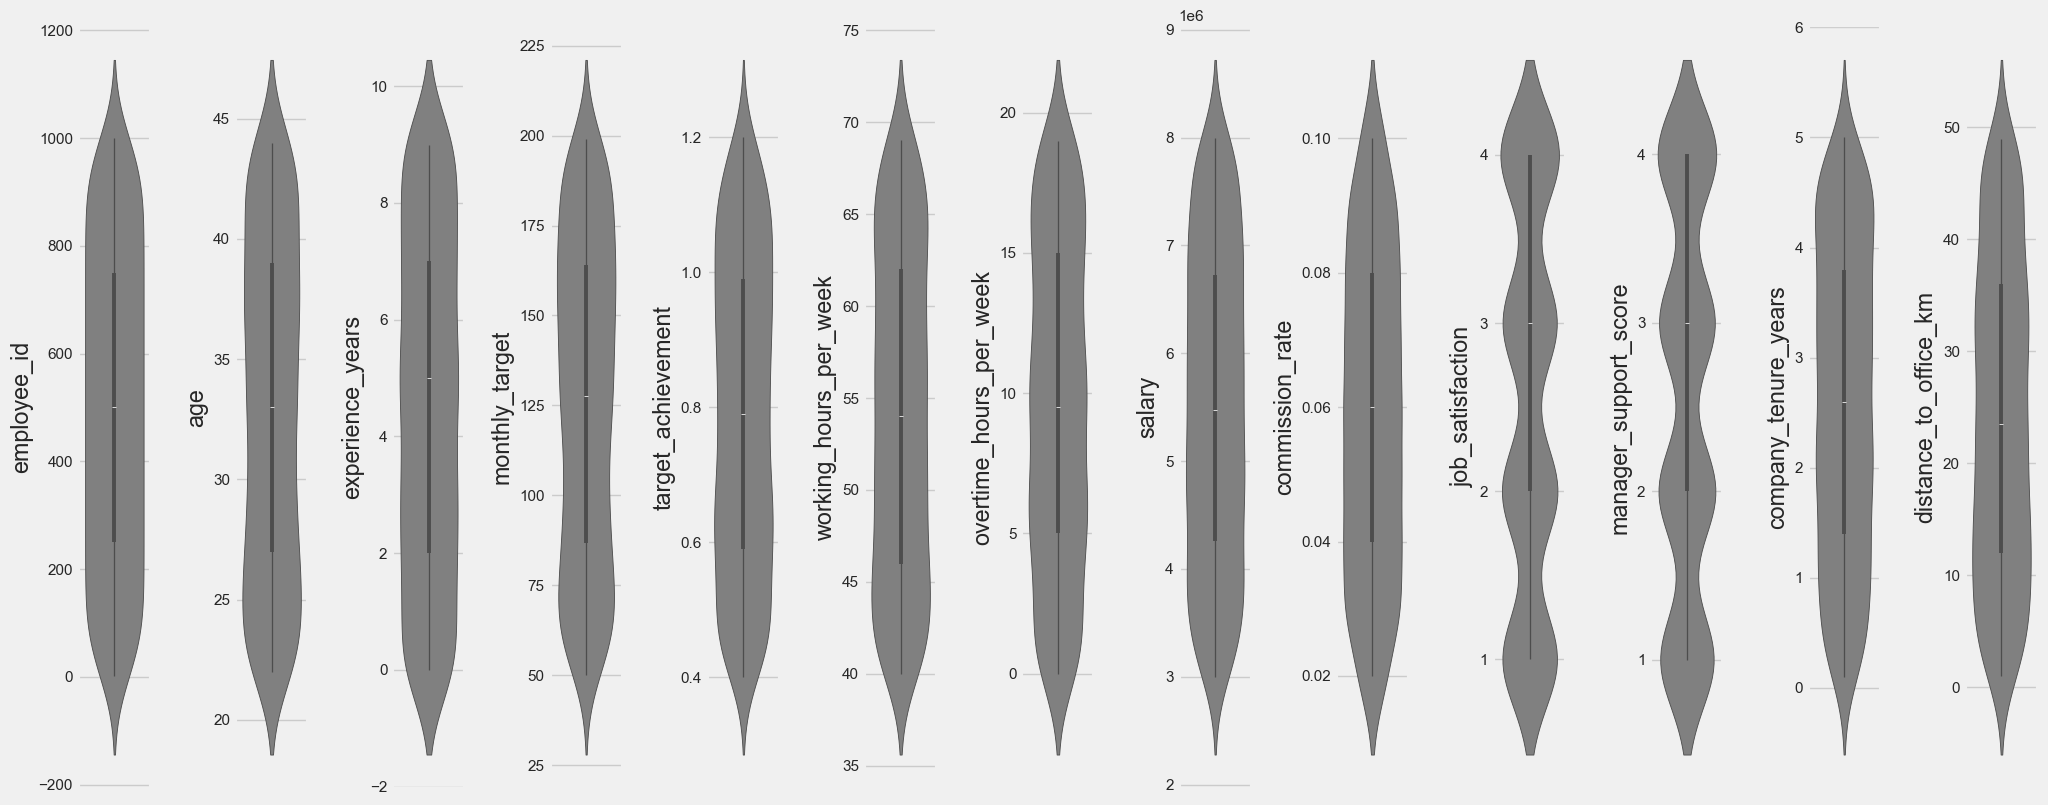

In [20]:
# Violin Plot
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()
plt.show()

In [21]:
# Multivariate Analysis

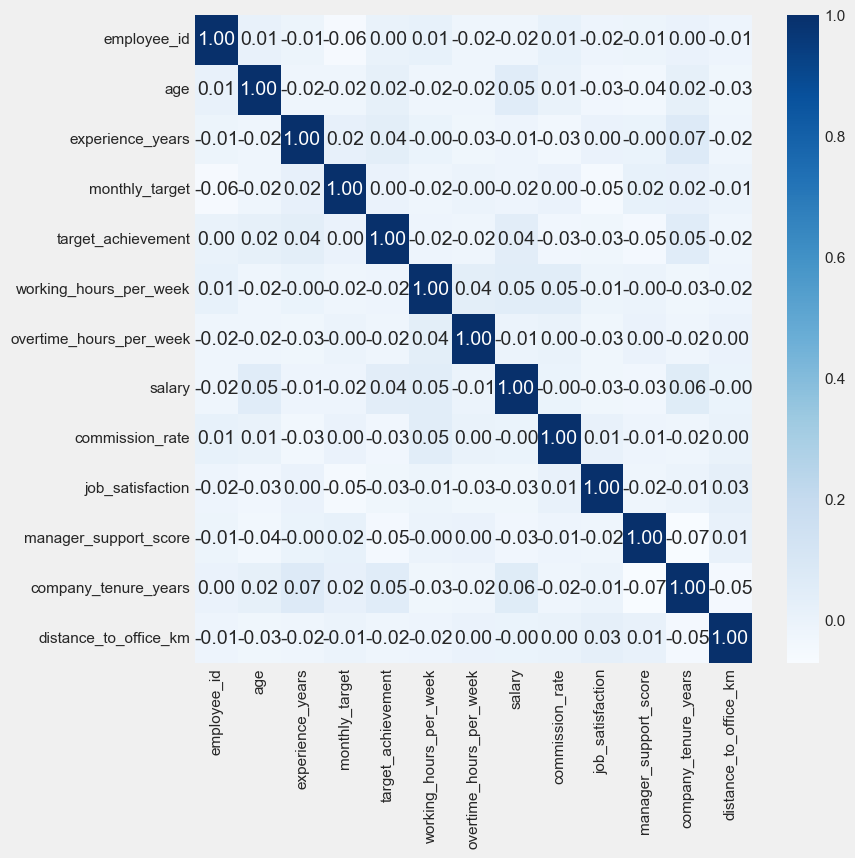

In [22]:
# Heat Map
plt.figure(figsize=(8, 8))
sns.heatmap(df[(nums)].corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

<Figure size 1500x1500 with 0 Axes>

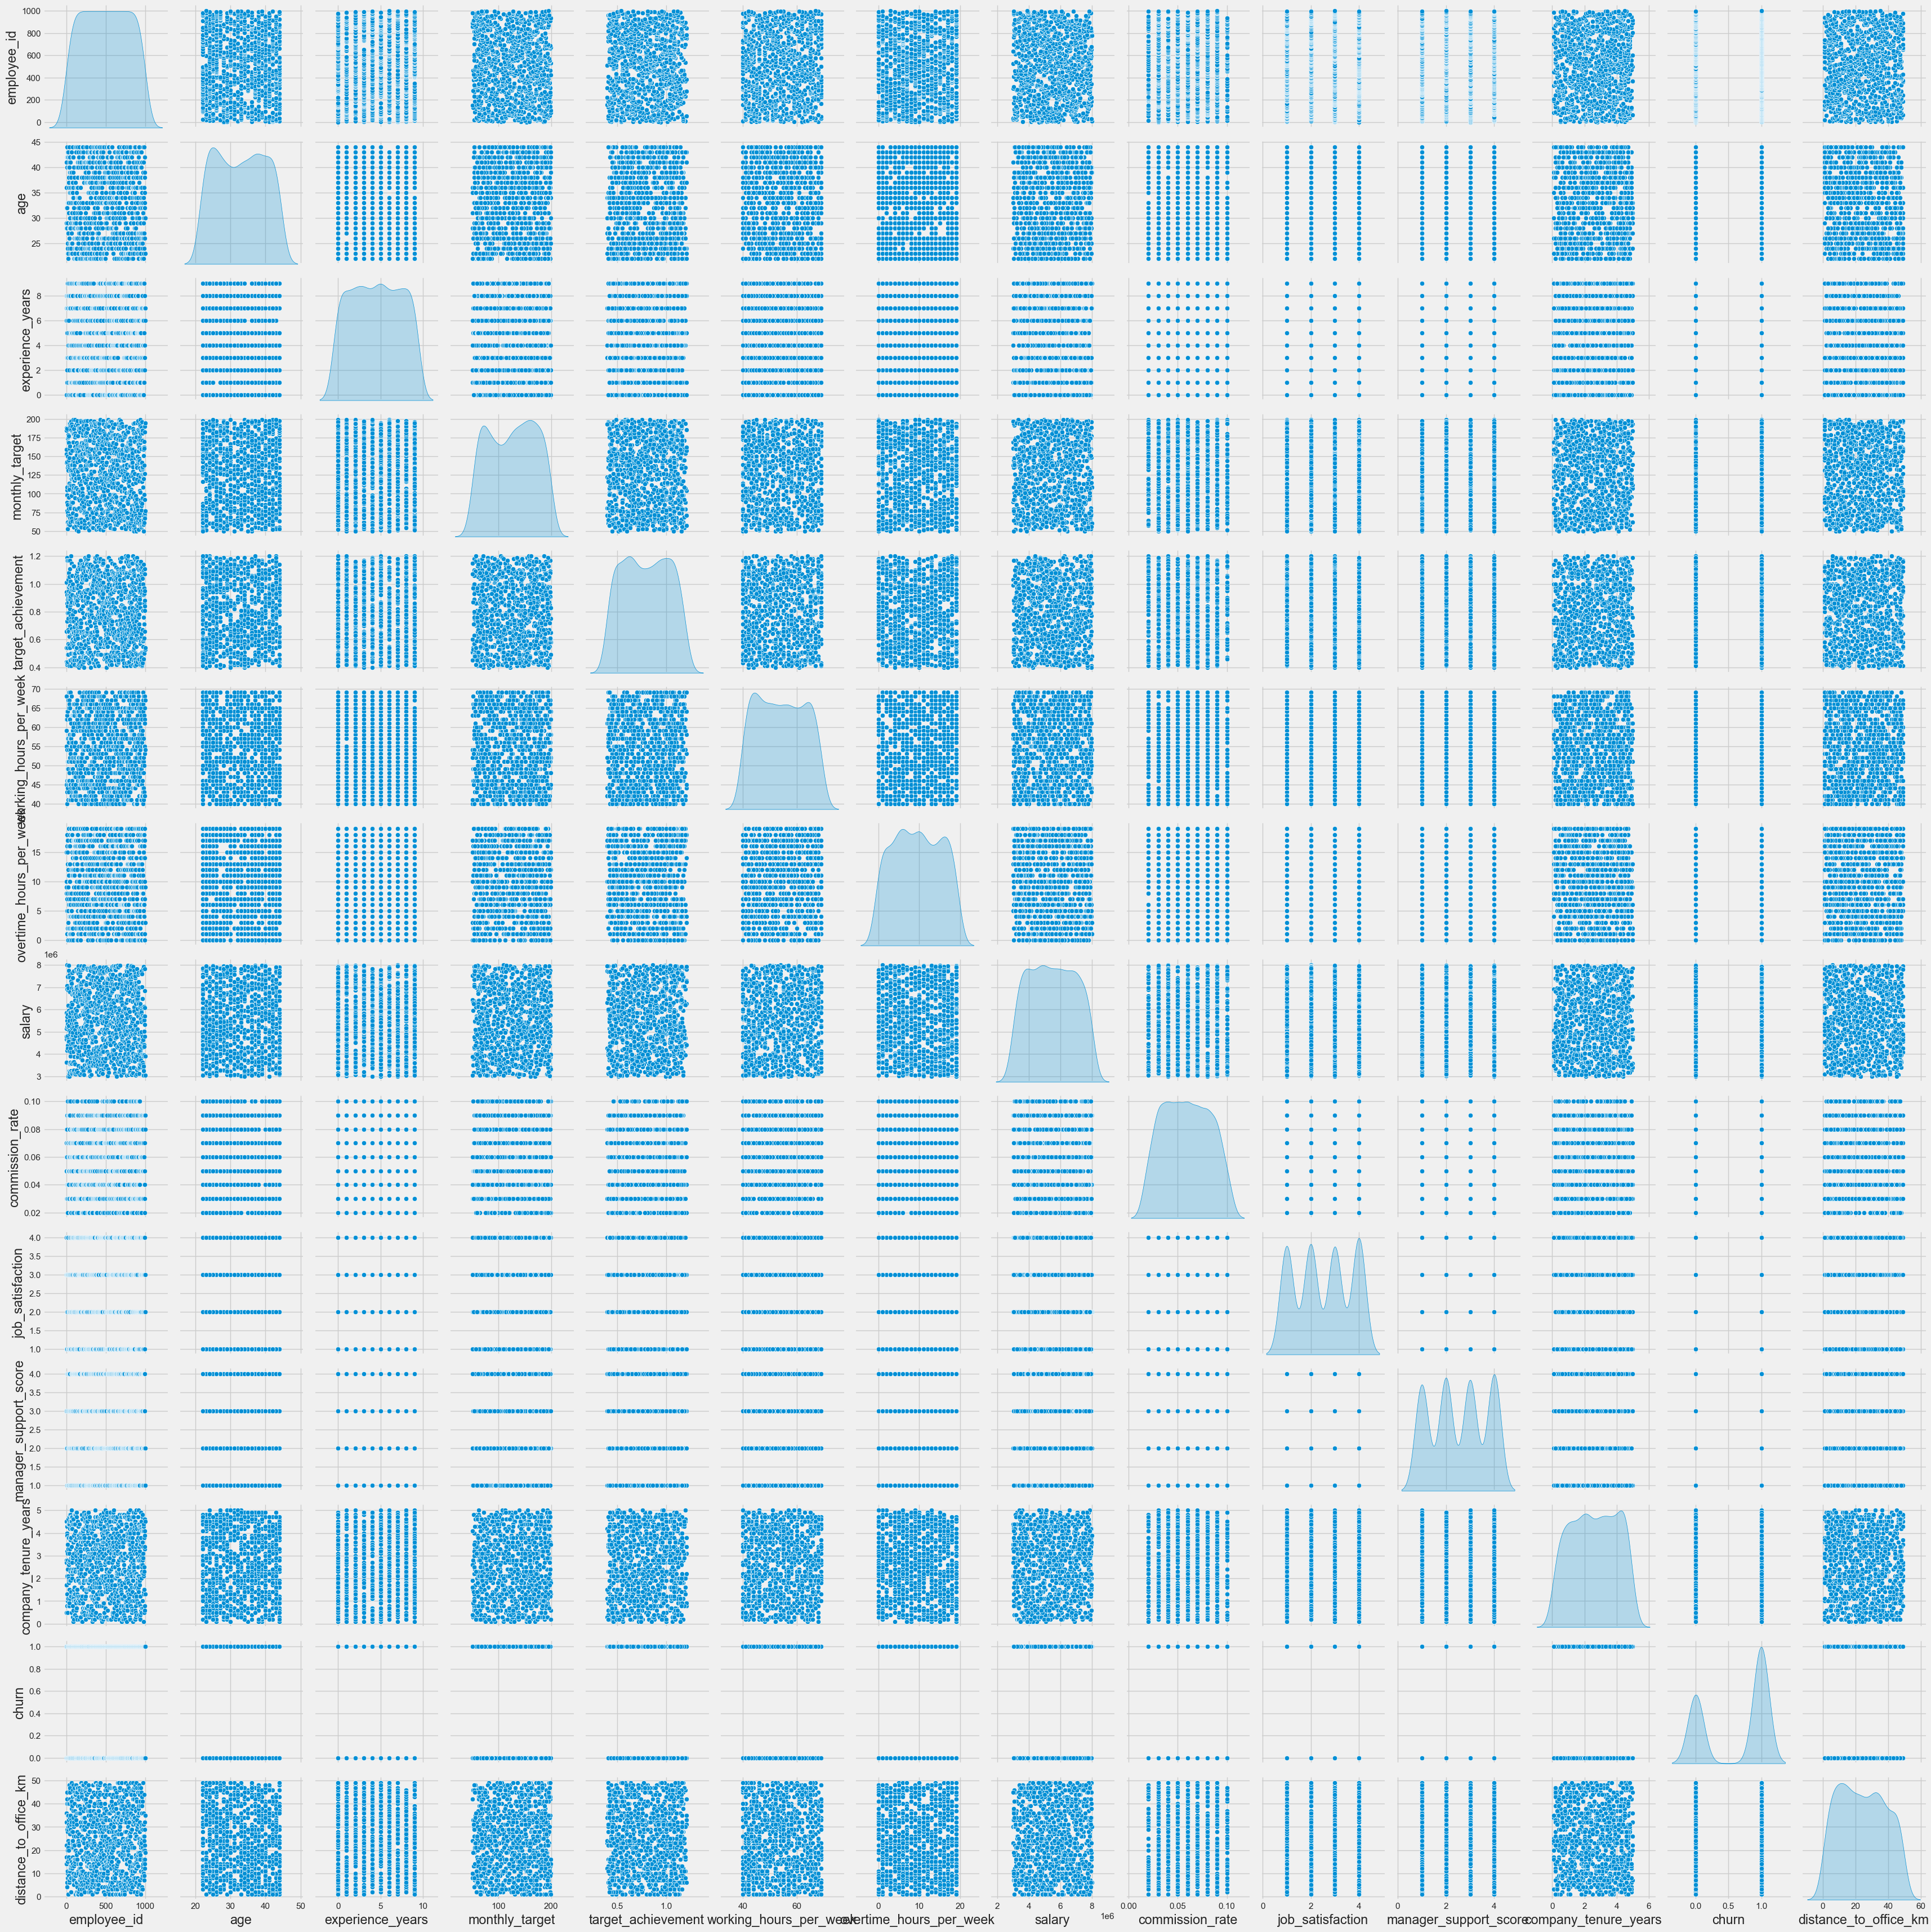

In [42]:
# Pair Plot
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde')
plt.show()

In [ ]:
# Data Preparation

In [31]:
df.isna().sum()

employee_id                0
age                        0
gender                     0
education                  0
experience_years           0
monthly_target             0
target_achievement         0
working_hours_per_week     0
overtime_hours_per_week    0
salary                     0
commission_rate            0
job_satisfaction           0
work_location              0
manager_support_score      0
company_tenure_years       0
churn                      0
marital_status             0
distance_to_office_km      0
churn_period               0
dtype: int64

In [32]:
# Duplicate Value
df.duplicated().sum()

0

In [35]:
# Outliers
from scipy import stats
# Filter Outliers menggunakan z-score

print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in ['employee_id', 'age', 'experience_years','monthly_target', 'target_achievement',
        'working_hours_per_week', 'overtime_hours_per_week', 'salary', 'commission_rate',
        'job_satisfaction', 'manager_support_score','company_tenure_years', 
        'distance_to_office_km']:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya

df2 = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df2)}')

Jumlah baris sebelum memfilter outlier: 1000
Jumlah baris setelah memfilter outlier: 1000


In [44]:
# Next To Do
# Data Transformasi
# Fitur Encoding
# PCA
# Dimentional Reduction
# Handling Class Imbalance